# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [19]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

**pandas (pd) and numpy (np):** Tools for working with data and numbers in a structured way.
<br>
<br>
**matplotlib.pyplot (plt) and seaborn (sns):** Used to create graphs and visualize data.
<br>
<br>
**scikit-learn tools:**
<br>
<br>
**train_test_split: Splits the data into two parts:** training and testing.
<br>
<br>
**StandardScaler:** Helps to scale/standardize the data so it can be used effectively in the model.
<br>
<br>
**LinearRegression:** The actual algorithm that builds a model to predict values.
mean_squared_error (MSE) and r2_score (R²): Measures to evaluate how well the model is doing.
<br>
<br>
**warnings.filterwarnings('ignore'):** Suppresses unnecessary warnings for a cleaner output.
<br><br>


### Loading and Understanding the Dataset

In [20]:
# [rows,columns]
df = pd.read_csv('clearboston.csv')
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [21]:
df.head(5) #display 5 rows of dataset

#10,000 rows
#data points collected from a combined cycle power plant over six years
#5 columns: AT ambient temp,V exhaust vacuum, AP ambient pressure, RH relative humdity, PE net hourly  electrical energy output
# independent variables: AT, V, AP and RH
# dependent variable: PE

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Loads the data from a CSV file into a **dataframe** (a table of data) and displays it.

In [22]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Displays information about the data: **column names, data types, and if any data is missing.**

In [23]:
# Check for any missing values in the dataset
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Checks for any missing values in the data.


### Separating the Data (Features and Target)

In [24]:
# Extract features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']
#X: All the columns except# "MEDV" (the home price) are considered features (factors that help predict the home price).
#y: The "MEDV" column is th#e target (what we're trying to predict: the home price).

### Splitting the Data for Training and Testing


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splits the data into two parts:
<br>
<br>
**Training data** (80% of the total): Used to train the model.
<br>
<br>
**Testing data** (20% of the total): Used to see how well the model performs on data it hasn’t seen before.
<br>
<br>
**random_state=42:** Ensures that the splitting is the same each time for consistent results.
<br>
<br>


In [26]:
# Initialize and fit the StandardScaler
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are DataFrames
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Standardizes (scales) the data so that all features have the same scale (important for models like this one).
<br>
<br>
**fit_transform:** Learns from the training data and scales it.
<br>
<br>
**transform:** Scales the test data using the same transformation applied to the training data.

## Part 2 - Building and training the model

### Training the Model

In [27]:
# linear_model is the module
# LinearRegression is a class is defining that LinearRegression is a class within the linear_model module. 
# It indicates that LinearRegression is a blueprint or template for creating objects that represent linear regression models.
# Class is a pre-coded blueprint of something we want to build from which objects are created.
# Initialize and train the Linear Regression model

# fit is a method inside LinearRegression class - they are like functions.
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

**model = LinearRegression():** Creates a new linear regression model.
<br>
<br>
**model.fit(X_train_scaled, y_train):** Trains the model using the scaled training data.

## Part 3: Evaluating the Model

In [28]:
# Perform cross-validation
cv_predictions = model.predict(X_test_scaled)
cv_mse = mean_squared_error(y_test, cv_predictions)
print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")

Cross-Validation Mean Squared Error: 24.2911


**cv_predictions:** The model predicts home prices based on the test data.
<br>
<br>
**cv_mse:** Calculates the average squared difference between the actual and predicted home prices. A lower number is better.

In [29]:
r2 = r2_score(y_test, cv_predictions)
print(f"R-squared: {r2:.4f}")

R-squared: 0.6688


**r2_score (R²):** Tells us how well the model explains the variation in home prices. A value closer to 1 means better performance.

### Comparing Actual vs Predicted Prices

In [30]:
results_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': cv_predictions
})
results_df.head(10)

,Actual Values,Predicted Values
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880
5,20.0,23.254429
6,17.8,17.662538
7,14.0,14.341190
8,19.6,23.013207
9,16.8,20.632456


Creates a table showing the **actual** home prices vs. the **predicted** prices for the first 10 test cases.

### Visualizing Predictions

#### Scatter Plot 

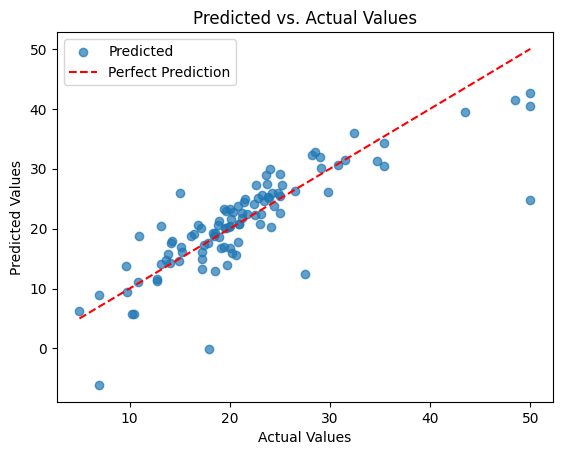

In [31]:
# Plotting the linear regression line
plt.scatter(y_test, cv_predictions, alpha=0.7, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()


**Scatter Plot:** Shows how close the predicted values are to the actual values.
<br><br>
**Red Line:** Represents "perfect prediction," where the predicted value would exactly match the actual value.


#### Residual Plot

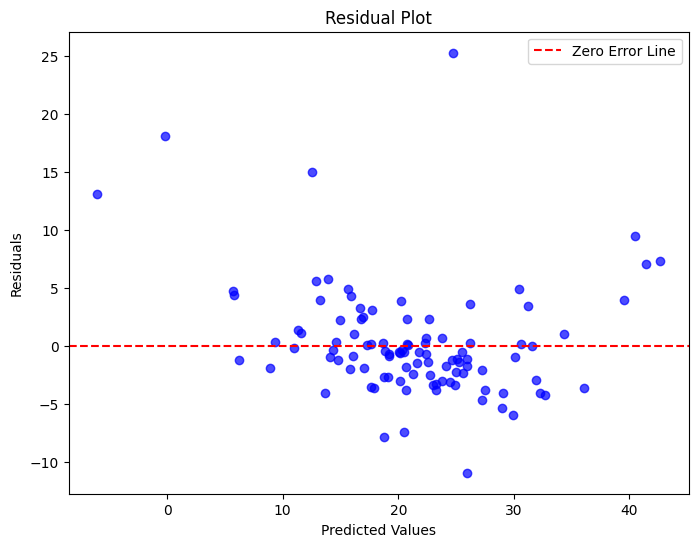

In [32]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test - cv_predictions

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(cv_predictions, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

The **residuals (errors)** show how far the predictions are from the actual values.
<br><br>
The **red line** at **0** represents perfect predictions.
<br>
<br>
Points **scattered randomly** around this line indicate that the model’s **errors are random**, meaning the model captures the pattern well. If there’s a pattern (like a curve), it suggests the model has some bias or is missing important information.


#### Making Predictions on New Data

In [33]:
from sklearn.preprocessing import StandardScaler

# Convert DataFrames to NumPy arrays
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

new_data = np.array([[0.02731, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98]])
new_data_scaled = scaler.transform(new_data)
predicted_value = model.predict(new_data_scaled)
print(f"Predicted Value: {predicted_value[0]:.2f}")

Predicted Value: 29.95


**new_data:** Inputs a new set of features for a house (in the same format as the original data).
<br><br>
**predicted_value:** Uses the trained model to predict the price of this new house, which is then printed.
